<a href="https://colab.research.google.com/github/Danilov-Aleksandr/CV_Korpus/blob/master/cifar_10_korpus_ml_4_0(in_class).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задача: обучить модель-классификатор, используя датасет Fashion Mnist и библиотеку Pytorch.**

---

In [ ]:
# Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms

## Загружаем и подготавливаем данные

fashion MNIST

---
Содержит 60000 + 10000 изображений одежды в черно-белом цвете.

Каждое из изображений принадлежит к одному из классов:

    T-shirt/top
    Trouser
    Pullover
    Dress
    Coat
    Sandal
    Shirt
    Sneaker
    Bag
    Ankle boot


--- 

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

Примеры изображений из датасета:

In [ ]:
# Загрузка и разделение данных на train/test в соотношении 60000/10000
trainset = datasets.CIFAR10('~/.pytorch/CIFAR10/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = datasets.CIFAR10('~/.pytorch/CIFAR10/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=True)
print(len(trainset))
print(len(testset))

Extracting /root/.pytorch/CIFAR10/cifar-10-python.tar.gz to /root/.pytorch/CIFAR10/
Files already downloaded and verified
50000
10000


In [ ]:
images, label = next(iter(trainloader))
images.shape

torch.Size([128, 3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

tensor([2, 1, 8, 1, 4, 6, 5, 0, 7, 4, 6, 1, 7, 4, 1, 3, 8, 3, 1, 6, 1, 6, 3, 7,
        2, 9, 8, 0, 4, 7, 5, 2, 7, 9, 4, 6, 5, 7, 7, 3, 7, 5, 8, 5, 2, 1, 3, 4,
        4, 5, 4, 7, 5, 0, 0, 3, 6, 0, 8, 1, 9, 0, 6, 1, 3, 2, 8, 9, 9, 9, 7, 2,
        8, 2, 0, 1, 8, 2, 3, 0, 6, 6, 6, 2, 4, 6, 9, 5, 9, 5, 5, 2, 2, 5, 2, 6,
        9, 4, 0, 0, 5, 7, 8, 0, 7, 3, 6, 4, 4, 8, 9, 4, 7, 1, 1, 0, 3, 2, 4, 0,
        2, 9, 1, 2, 2, 5, 7, 1])



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

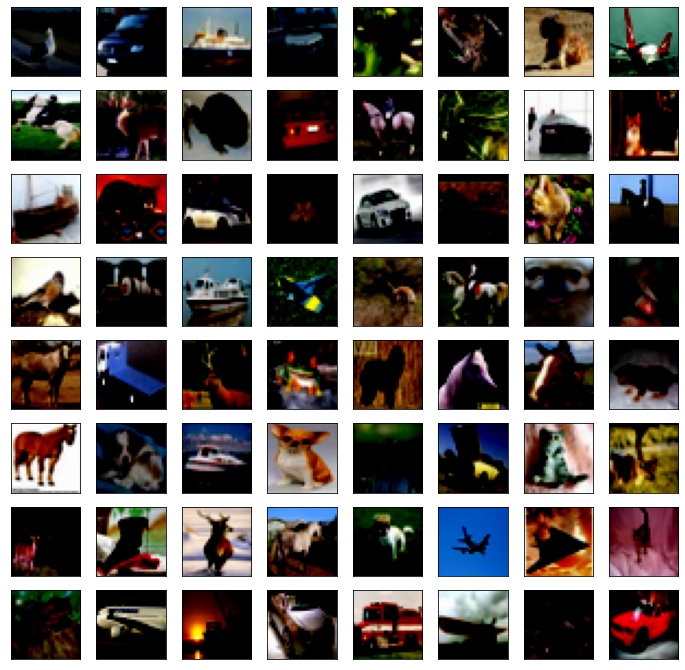

In [ ]:
images, label = next(iter(trainloader))
print(label)
n = len(images)
plt.figure(figsize=(12, 12))
for i, image in enumerate(images[:64]):
    plt.subplot(8, 8, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image.numpy().transpose((1, 2, 0)).squeeze())


На CPU учится медленно

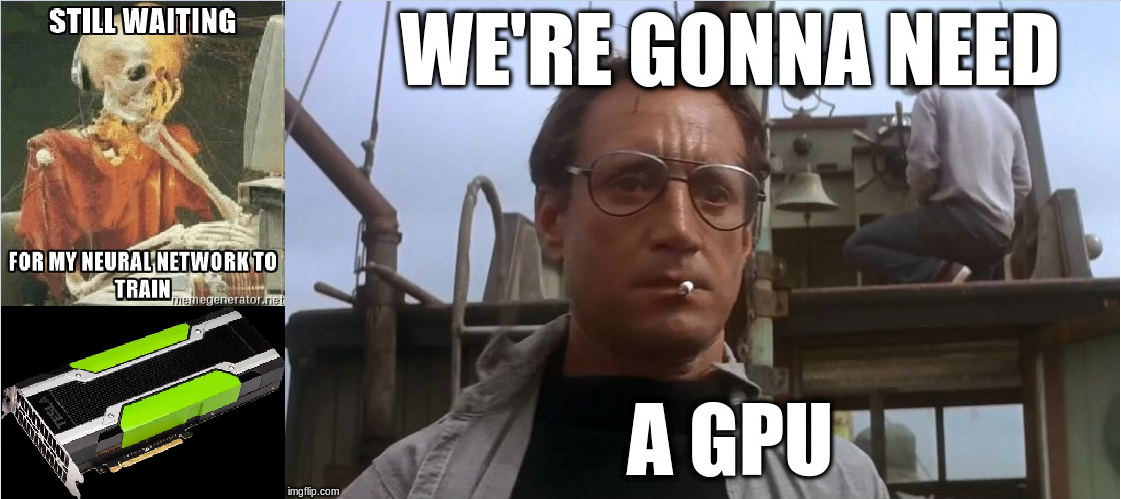

## Где взять GPU
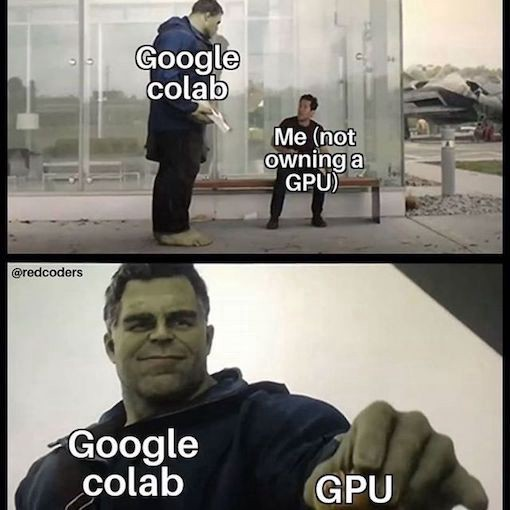


In [ ]:
!nvidia-smi

Wed Aug 19 05:26:31 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu" )

In [ ]:
device


device(type='cuda', index=0)

In [ ]:
class CNN(nn.Module):
    """CNN."""

    def __init__(self):
        """CNN Builder."""
        super(CNN, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )


    def forward(self, x):
        """Perform forward."""
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x

In [ ]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
    
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(15 * 15 * 16, 10)
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        out = self.cnn2(x)
        out = self.relu2(out)
        out = self.maxpool2(out)
        # Linear function (readout)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)        
        return out


In [ ]:
lr = 0.1
n_epoch = 30


model = CNN().to(device)

optimizer = optim.SGD(model.parameters(), lr=lr,)
criterion = nn.CrossEntropyLoss()
sheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=1, factor = 0.5,)

Обучим сеточку

In [ ]:
model.train()
train_loss = []
train_losses = []
for epoch in range(n_epoch):
    for i, (data, target) in enumerate(trainloader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()       
        optimizer.step()

        train_loss.append(loss.item())
    
    sheduler.step(np.mean(train_loss))


    print(f" Номер эпохи: {epoch+1}, Трейн лосс: {np.mean(train_loss)}, Текущий лернинг рейт: {optimizer.param_groups[0]['lr']} ")
    train_losses.append(np.mean(train_loss))

 Номер эпохи: 1, Трейн лосс: 1.5202048966646804, Текущий лернинг рейт: 0.1 
 Номер эпохи: 2, Трейн лосс: 1.2437161211010135, Текущий лернинг рейт: 0.1 
 Номер эпохи: 3, Трейн лосс: 1.0714440068320545, Текущий лернинг рейт: 0.1 
 Номер эпохи: 4, Трейн лосс: 0.9499201008959499, Текущий лернинг рейт: 0.1 
 Номер эпохи: 5, Трейн лосс: 0.8555285172846616, Текущий лернинг рейт: 0.1 
 Номер эпохи: 6, Трейн лосс: 0.778420029565349, Текущий лернинг рейт: 0.1 
 Номер эпохи: 7, Трейн лосс: 0.713203168074319, Текущий лернинг рейт: 0.1 
 Номер эпохи: 8, Трейн лосс: 0.6555543783766306, Текущий лернинг рейт: 0.1 
 Номер эпохи: 9, Трейн лосс: 0.6047011975100532, Текущий лернинг рейт: 0.1 
 Номер эпохи: 10, Трейн лосс: 0.5594726426588833, Текущий лернинг рейт: 0.1 
 Номер эпохи: 11, Трейн лосс: 0.5189395569736072, Текущий лернинг рейт: 0.1 
 Номер эпохи: 12, Трейн лосс: 0.4827313473164711, Текущий лернинг рейт: 0.1 
 Номер эпохи: 13, Трейн лосс: 0.45124977935979904, Текущий лернинг рейт: 0.1 
 Номер эп

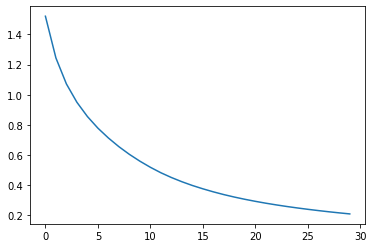

In [ ]:
plt.plot(train_losses)
plt.show()

## Тестирование модели

In [ ]:
model.eval()
correct = 0

with torch.no_grad():
  for data, target in testloader:
    data = data.to(device=device)
    target = target.to(device=device)
    outputs = model(data)
    _, predicted = torch.max(outputs.data, 1)
    correct += (predicted == target).sum().item()


acc = correct / len(testset)
print(f'Accuracy on test set: {acc}')

Accuracy on test set: 0.8544


Поиграться со свертками можно тут: https://ezyang.github.io/convolution-visualizer/index.html


Мы обучили модель и получили неплохой результат:

### ЗАДАНИЕ 1

---

Поиграйтесь с моделью, и получите точность выше того, что вы получали на предыдущей лекции.

### ЗАДАНИЕ 2

---

Вы уже знакомы с разными видами слоев, функций активаций и оптимизаторов. Попробуйте загрузить датасет cifar10 вместо fashion_mnist и обучить свою нейронную сеть с как можно большей валидационной точностью. Параметры сети и архитектуру можно менять по своему усмотрению.

---

В качестве ориентира возмите за нижнюю границу точности 0.7

CIFAR10

---
Содержит 50000 + 10000 изображений с различными классами.

Каждое из изображений принадлежит к одному из классов:

    Airplane
    Automobile
    Bird
    Cat
    Deer
    Dog
    Frog
    Horse
    Ship
    Truck


--- 